In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, geom_point, aes

In [2]:
# Read the data
ames = pd.read_csv("/content/sample_data/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()


In [3]:
#Linear Model
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
arraylin=cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')
arraylin

array([-4.59217770e+20, -1.21723181e+20, -8.37868327e+19, -9.71584476e+20,
       -3.78389822e+20])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_1_fitted = lr_pipeline_1.fit(X_train, y_train)
lr_coef=lr_1_fitted.named_steps["linear_regression"].coef_
lr_coef

array([-4.82299247e+13, -4.82299247e+13, -4.82299247e+13, -4.82299247e+13,
       -4.82299247e+13, -4.82299247e+13,  2.17520966e+16,  2.17520966e+16,
       -8.06933159e+16, -8.06933159e+16, -8.06933159e+16, -8.06933159e+16,
       -1.71343940e+16, -1.71343940e+16, -1.71343940e+16, -1.71343940e+16,
        3.78101147e+14,  3.78101147e+14,  3.78101147e+14, -3.46451655e+16,
       -3.46451655e+16, -3.46451655e+16, -3.46451655e+16, -3.46451655e+16,
       -4.57527846e+16, -4.57527846e+16, -4.57527846e+16,  2.36175592e+15,
        2.36175592e+15,  2.36175592e+15,  2.36175592e+15,  2.36175592e+15,
        2.36175592e+15,  2.36175592e+15,  2.36175592e+15,  2.36175592e+15,
        2.36175592e+15,  2.36175592e+15,  2.36175592e+15,  2.36175592e+15,
        2.36175592e+15,  2.36175592e+15,  2.36175592e+15,  2.36175592e+15,
        2.36175592e+15,  2.36175592e+15,  2.36175592e+15,  2.36175592e+15,
        2.36175592e+15,  2.36175592e+15,  2.36175592e+15,  2.36175592e+15,
        2.36175592e+15,  

In [ ]:
Practice Activity 1

In [5]:
# Ridge Regression
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)
lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("Ridge_regression", Ridge(alpha=1))]
)
arrayridge=cross_val_score(lr_pipeline_2, X, y, cv = 5, scoring = 'r2')
arrayridge

array([0.8983804 , 0.91749817, 0.79251623, 0.78248152, 0.91492025])

In [6]:
pd.DataFrame({"linear coefs":arraylin,
             "ridge coefs":arrayridge})

,linear coefs,ridge coefs
0,-4.592178e+20,0.898380
1,-1.217232e+20,0.917498
2,-8.378683e+19,0.792516
3,-9.715845e+20,0.782482
4,-3.783898e+20,0.914920


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns.difference(categorical_columns)),
        ('cat', categorical_transformer, categorical_columns)
    ])


ridge_model = Ridge()
lr_pipeline_2 = Pipeline([
    ('preprocessor', preprocessor),
    ('Ridge_regression', ridge_model)
])

lr_2_fitted = lr_pipeline_2.fit(X_train, y_train)


ridge_coef = lr_2_fitted.named_steps["Ridge_regression"].coef_

plotgraph = pd.DataFrame({"linear coefs": lr_coef, "ridge coefs": ridge_coef})



In [14]:
plotgraph

,linear coefs,ridge coefs
0,1.660420e+17,6407.242511
1,1.660420e+17,12376.304310
2,1.660420e+17,384.282334
3,1.660420e+17,-1194.377406
4,1.660420e+17,2410.742161
...,...,...
251,2.811000e+03,7380.899891
252,3.264000e+03,13525.169689
253,-8.721000e+03,-7395.583338
254,-8.200000e+02,-492.732131


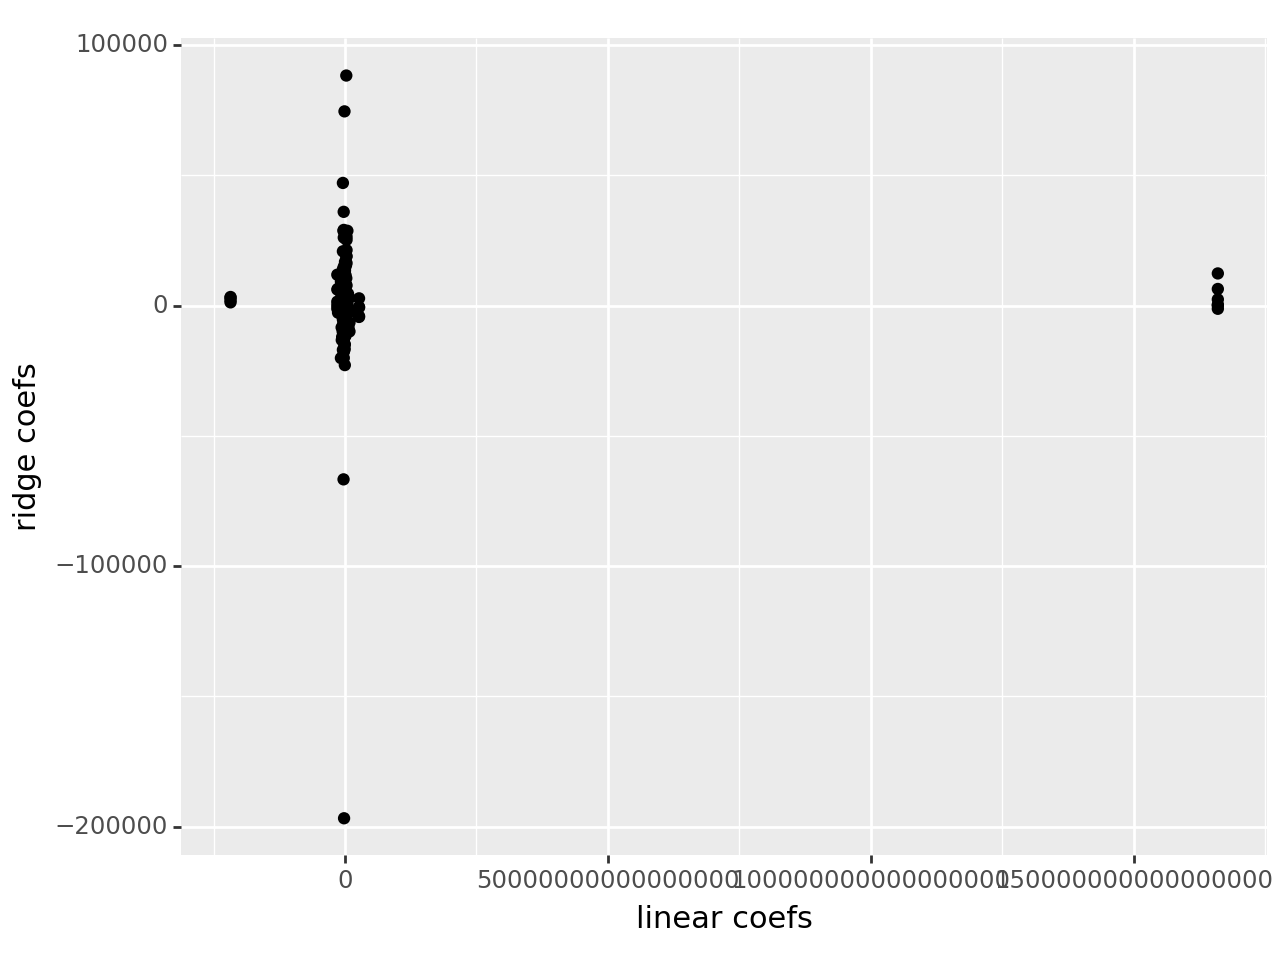

In [18]:

from plotnine import ggplot, aes, geom_point
plot = ggplot(plotgraph, aes(x='linear coefs', y='ridge coefs')) + geom_point()
print(plot)

Practice Activity 2

In [19]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)
lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("Ridge_regression", Ridge())]
).set_output(transform="pandas")

alphas = {'Ridge_regression__alpha': np.arange(0.001, 0.01, 0.1)}

gscv = GridSearchCV(lr_pipeline_2, alphas, cv = 5, scoring='r2')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
gscv_fitted = gscv.fit(X, y)

ridge_coef=gscv_fitted.cv_results_['mean_test_score']

Practice Activity 3

In [27]:
# Lasso Regression
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)
lr_pipeline_3 = Pipeline(
  [("preprocessing", ct),
  ("LASSO_regression", Lasso())]
).set_output(transform="pandas")

alphas = {'LASSO_regression__alpha': np.arange(10, 20,100)}

gscv = GridSearchCV(lr_pipeline_3, alphas, cv = 5, scoring='r2')

In [28]:
lasso_fitted = gscv.fit(X_train, y_train)

lasso_coef=lasso_fitted.cv_results_['mean_test_score']

In [29]:
lagraph=pd.DataFrame({"lasso coefs":lasso_coef})
plotgraph=pd.concat([plotgraph, lagraph], axis=1)
plotgraph

,linear coefs,ridge coefs,lasso coefs
0,1.660420e+17,6407.242511,0.856009
1,1.660420e+17,12376.304310,NaN
2,1.660420e+17,384.282334,NaN
3,1.660420e+17,-1194.377406,NaN
4,1.660420e+17,2410.742161,NaN
...,...,...,...
251,2.811000e+03,7380.899891,NaN
252,3.264000e+03,13525.169689,NaN
253,-8.721000e+03,-7395.583338,NaN
254,-8.200000e+02,-492.732131,NaN


Practice Activity 4

In [30]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)
lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
   ("elastic_net", ElasticNet())]
).set_output(transform="pandas")

param = {
    "elastic_net__alpha": np.arange(0.001, 0.01, 0.1),
    "elastic_net__l1_ratio": np.arange(.10, .20, .30)
    }

gscv = GridSearchCV(lr_pipeline_4, param, cv = 5, scoring='r2')

In [31]:
elastic_fitted = gscv.fit(X_train, y_train)
elastic_coef=elastic_fitted.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.502e+11, tolerance: 1.104e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.768e+11, tolerance: 1.139e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.558e+11, tolerance: 1.153e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.p

In [32]:
elgraph=pd.DataFrame({"elastic coefs":elastic_coef})
plotgraph=pd.concat([plotgraph, elgraph], axis=1)
plotgraph

,linear coefs,ridge coefs,lasso coefs,elastic coefs
0,1.660420e+17,6407.242511,0.856009,0.856222
1,1.660420e+17,12376.304310,NaN,NaN
2,1.660420e+17,384.282334,NaN,NaN
3,1.660420e+17,-1194.377406,NaN,NaN
4,1.660420e+17,2410.742161,NaN,NaN
...,...,...,...,...
251,2.811000e+03,7380.899891,NaN,NaN
252,3.264000e+03,13525.169689,NaN,NaN
253,-8.721000e+03,-7395.583338,NaN,NaN
254,-8.200000e+02,-492.732131,NaN,NaN
